<a href="https://colab.research.google.com/github/awaiskhan005/DEEP-LEARNING-AND-FORECASTING/blob/main/SMCI_STOCK_PREDICTION_USING_COLAB_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyse this data and do all the possible things and next proceed to machine learnig or deep learni g to predict the prices

Here is all the data you need:
"SMCI (6).csv"

## Data loading

### Subtask:
Load the "SMCI (6).csv" file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the CSV file into a DataFrame named `df`.



In [1]:
import pandas as pd

df = pd.read_csv('SMCI (6).csv')
display(df.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-16,340.549988,352.000000,324.309998,326.309998,326.309998,4732900
1,2024-01-17,320.510010,322.000000,305.750000,318.230011,318.230011,3585800
2,2024-01-18,330.010010,334.000000,306.470001,311.440002,311.440002,4875100
3,2024-01-19,347.559998,428.690002,338.880005,423.359985,423.359985,23049300
4,2024-01-22,456.350006,485.859985,410.190002,436.239990,436.239990,18823300


## Data exploration

### Subtask:
Explore the loaded data to understand its structure and characteristics.


**Reasoning**:
Explore the data's structure and characteristics by examining its shape, data types, summary statistics, missing values, and unique values for categorical variables.



In [2]:
# Examine the shape
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData types of columns:\n", df.dtypes)

# View summary statistics for numerical columns
print("\nSummary statistics:\n", df.describe())

# Identify missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Examine unique values for the 'Date' column (categorical)
print("\nUnique dates:\n", df['Date'].unique())
print("\nValue counts for dates:\n", df['Date'].value_counts())

Shape of the DataFrame: (124, 7)

Data types of columns:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Summary statistics:
               Open         High          Low        Close    Adj Close  \
count   124.000000   124.000000   124.000000   124.000000   124.000000   
mean    835.124596   866.847903   801.559599   835.060399   835.060399   
std     179.316496   182.971718   169.155111   174.403804   174.403804   
min     320.510010   322.000000   305.750000   311.440002   311.440002   
25%     776.769989   801.897507   751.150024   774.307495   774.307495   
50%     852.350006   890.675019   824.815002   854.274994   854.274994   
75%     925.050003   971.342514   885.732499   918.232514   918.232514   
max    1212.000000  1229.000000  1122.339966  1188.069946  1188.069946   

             Volume  
count  1.240000e+02  
mean   8.816169e+06  
std    5.630754e+06  
min 

## Data cleaning

### Subtask:
Clean the data by handling any potential issues like duplicate rows and outliers.


**Reasoning**:
Check for duplicate rows and remove them if any.



In [3]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
  print("Duplicate rows found:")
  display(duplicate_rows)
  # Remove duplicate rows (keeping the first occurrence)
  df = df.drop_duplicates()
  print("Duplicate rows removed.")
else:
  print("No duplicate rows found.")

No duplicate rows found.


**Reasoning**:
Explore the numerical columns to identify potential outliers using box plots.



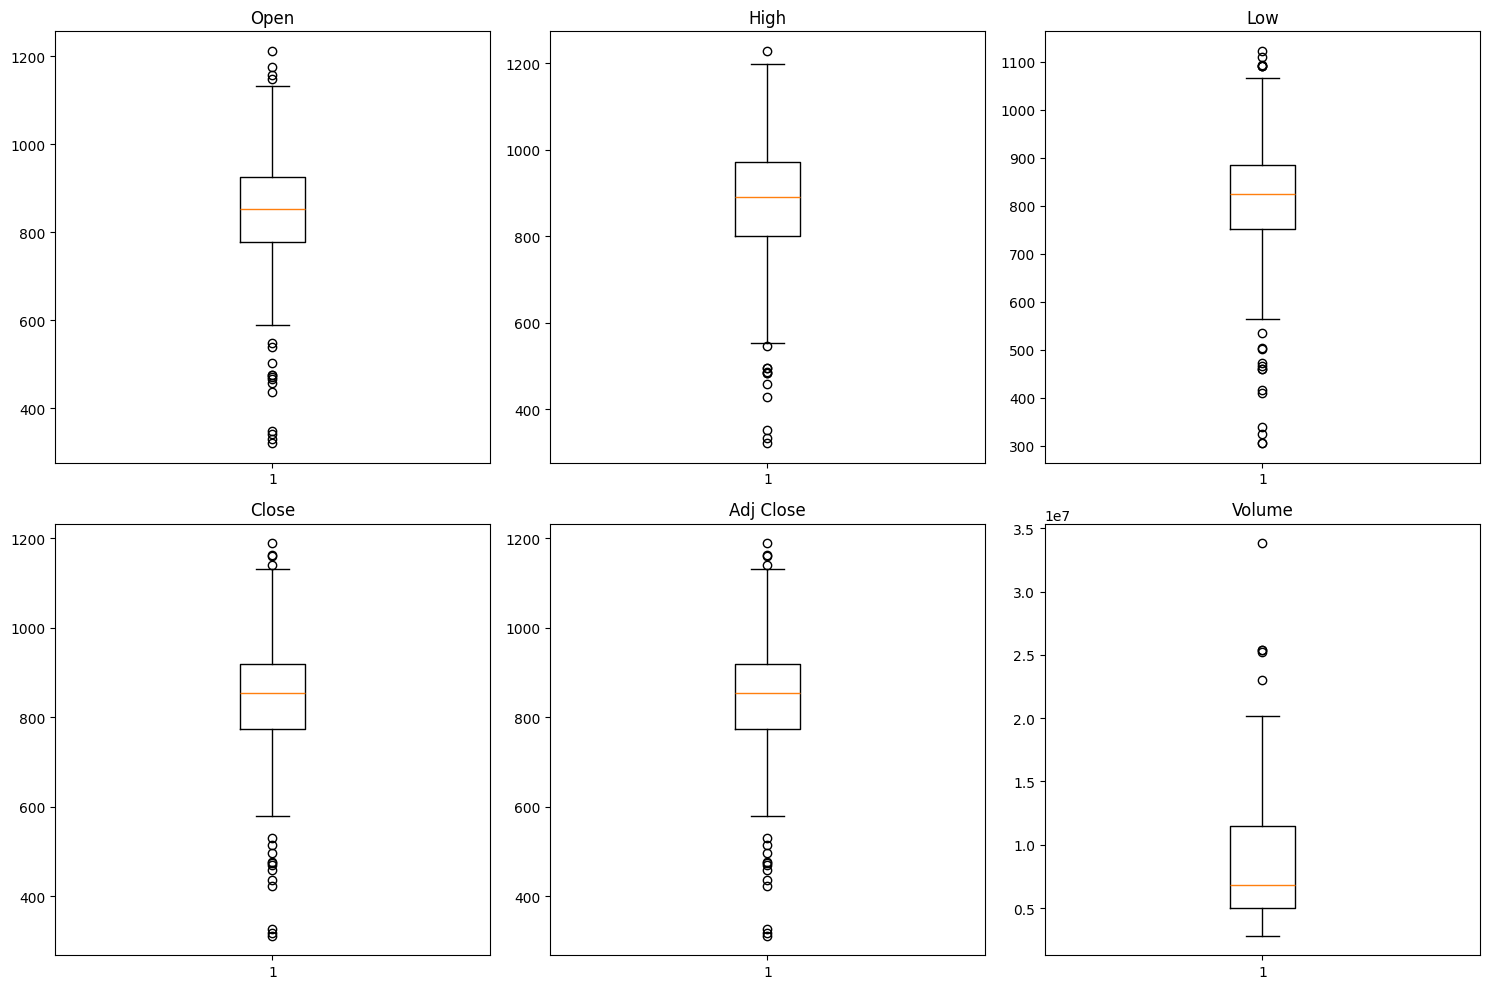

In [4]:
import matplotlib.pyplot as plt

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Data wrangling

### Subtask:
Prepare the data for analysis and modeling.


**Reasoning**:
Convert the 'Date' column to datetime objects, set it as the index, and create a new 'Daily Range' feature.



In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df['Daily Range'] = df['High'] - df['Low']

**Reasoning**:
Normalize the numerical features using MinMaxScaler.



In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Range']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## Data analysis

### Subtask:
Perform exploratory data analysis (EDA) on the prepared dataset `df` to gain insights into the relationships between variables and identify patterns in the data.


**Reasoning**:
Calculate the correlation matrix and visualize it using a heatmap to understand the linear relationships between variables.



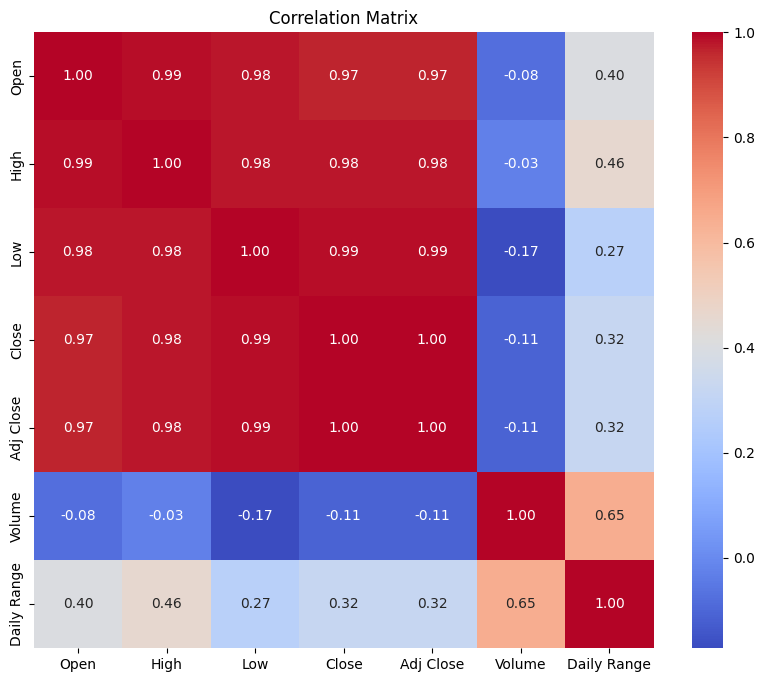

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Reasoning**:
Analyze the distribution of each numerical feature using histograms.



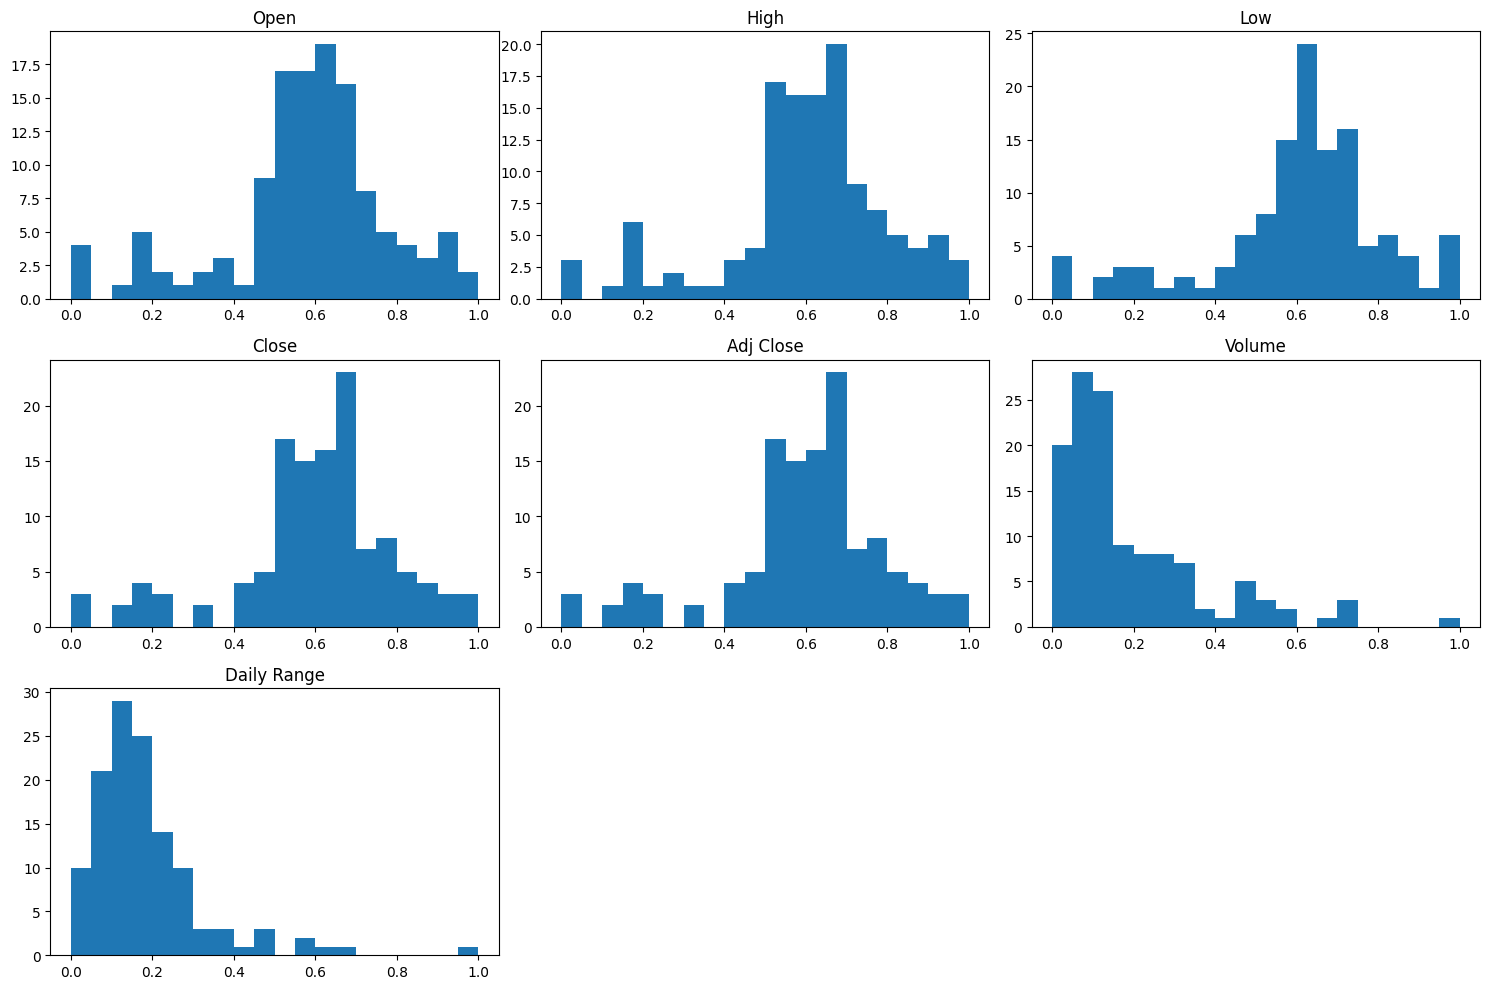

In [8]:
import matplotlib.pyplot as plt

# Analyze the distribution of each numerical feature using histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[column], bins=20)
    plt.title(column)
plt.tight_layout()
plt.show()

**Reasoning**:
Explore the relationship between the 'Close' price and other features (e.g., 'Volume', 'Daily Range') using scatter plots.



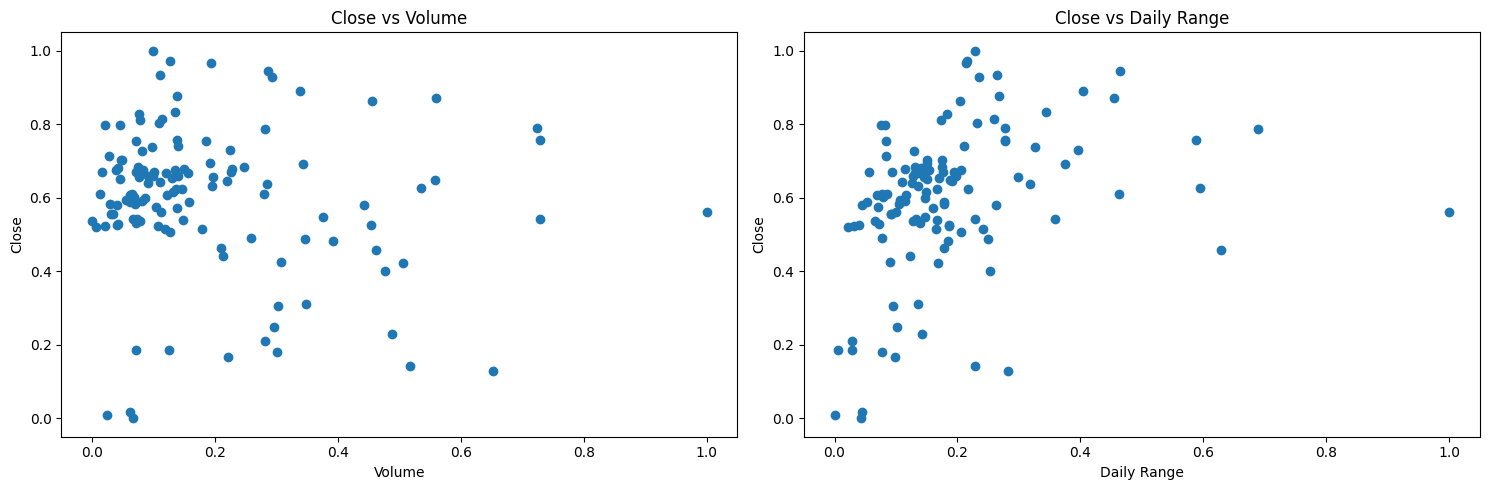

In [9]:
import matplotlib.pyplot as plt

# Explore the relationship between 'Close' price and other features using scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Volume'], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Close')
plt.title('Close vs Volume')

plt.subplot(1, 2, 2)
plt.scatter(df['Daily Range'], df['Close'])
plt.xlabel('Daily Range')
plt.ylabel('Close')
plt.title('Close vs Daily Range')

plt.tight_layout()
plt.show()

**Reasoning**:
Calculate and analyze descriptive statistics for the 'Close' price, such as mean, median, standard deviation, and quartiles.



In [10]:
# Calculate and analyze descriptive statistics for the 'Close' price
close_stats = df['Close'].describe()
print(close_stats)

# You can also calculate specific statistics individually if needed
# e.g., median = df['Close'].median()

count    124.000000
mean       0.597311
std        0.198948
min        0.000000
25%        0.528008
50%        0.619229
75%        0.692188
max        1.000000
Name: Close, dtype: float64


**Reasoning**:
Identify any potential trends or patterns in the 'Close' price over time using a line plot.



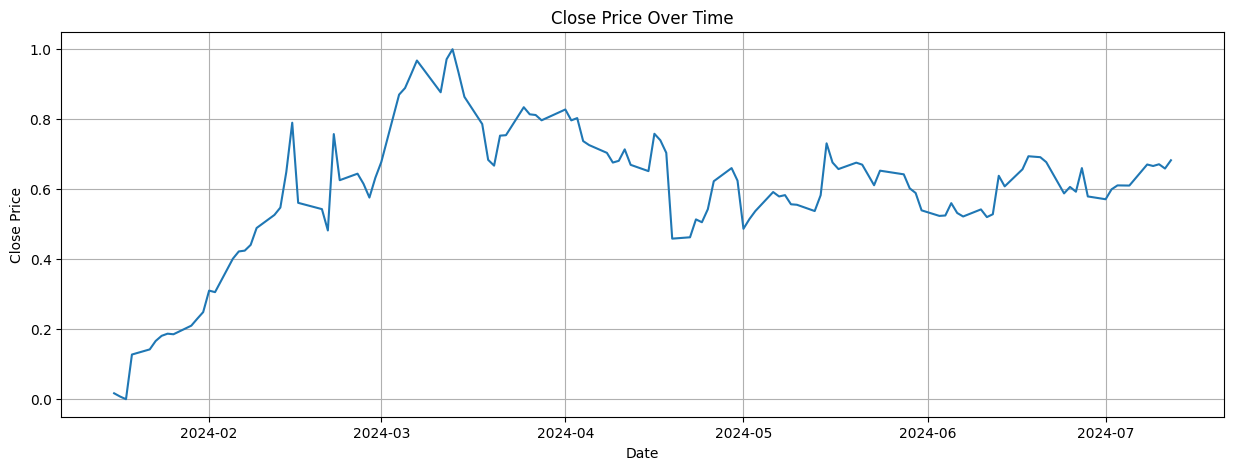

In [11]:
import matplotlib.pyplot as plt

# Identify any potential trends or patterns in the 'Close' price over time using a line plot
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.grid(True)
plt.show()

## Data visualization

### Subtask:
Visualize the key findings from the data analysis using relevant plots and charts.


**Reasoning**:
Create line plots, histograms, scatter plots and heatmaps to visualize the key findings from the data analysis, as instructed.



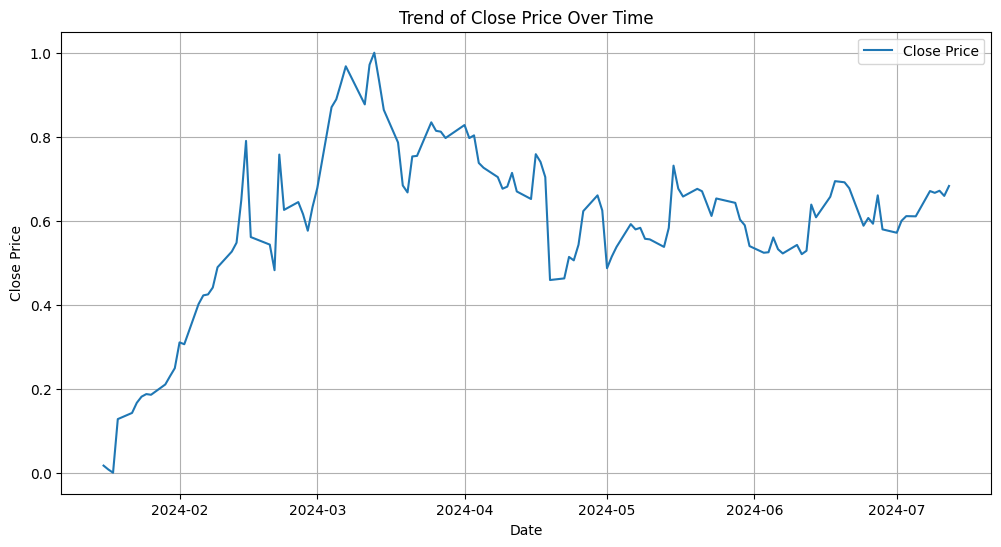

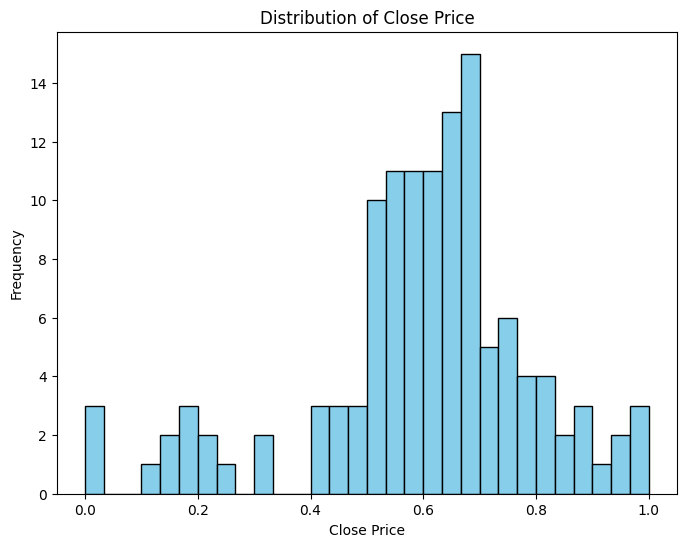

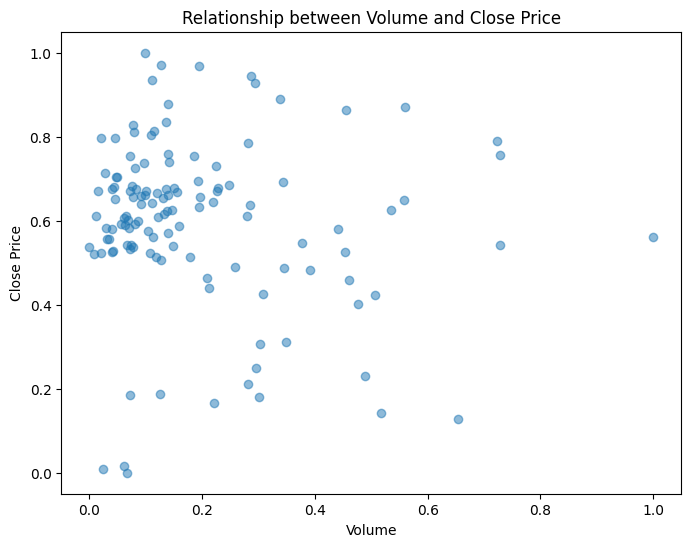

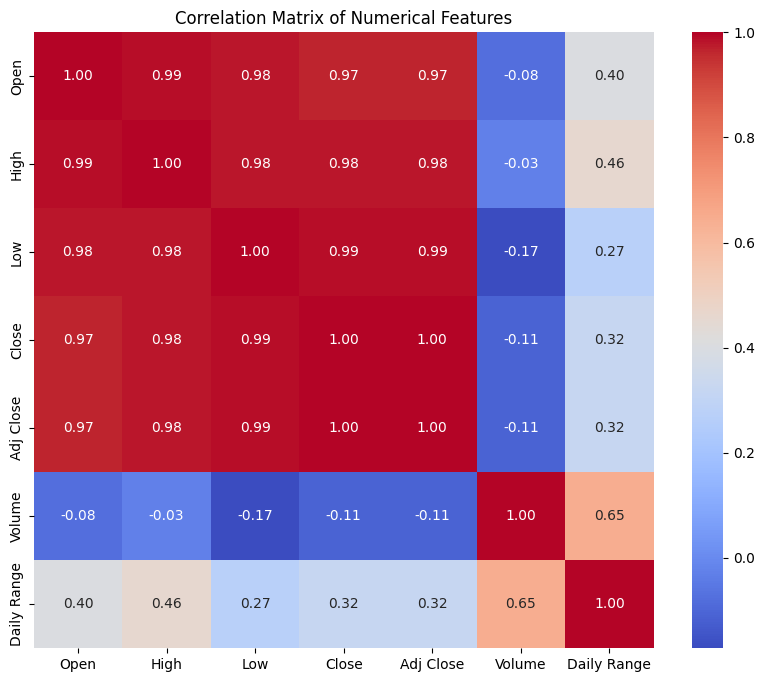

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Line plot showing the trend of the 'Close' price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Trend of Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


# 2. Histogram to visualize the distribution of the 'Close' price
plt.figure(figsize=(8, 6))
plt.hist(df['Close'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Close Price')
plt.show()


# 3. Scatter plot to show the relationship between 'Volume' and 'Close' price
plt.figure(figsize=(8, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Relationship between Volume and Close Price')
plt.show()


# 4. Heatmap to visualize the correlation matrix of the numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Reasoning**:
Create a box plot to detect outliers in the 'Close' price and a time series decomposition plot to further analyze the 'Close' price trend.



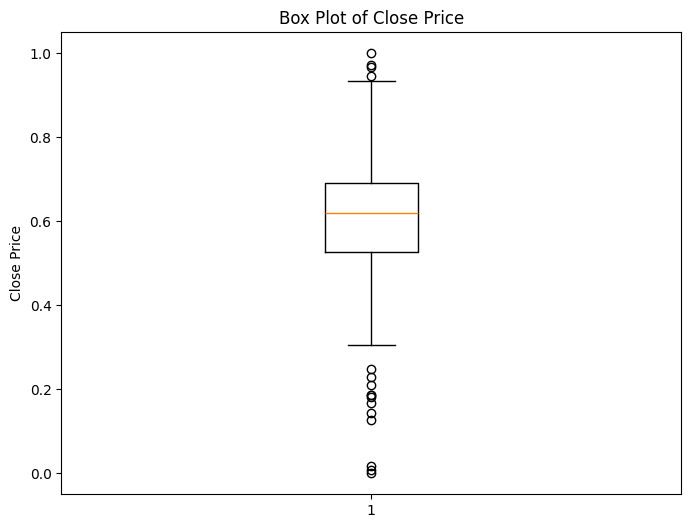

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 5. Box plot for outlier detection in 'Close' price
plt.figure(figsize=(8, 6))
plt.boxplot(df['Close'])
plt.ylabel('Close Price')
plt.title('Box Plot of Close Price')
plt.show()


# 6. Time series decomposition plot for further analysis of 'Close' price trend
result = seasonal_decompose(df['Close'], model='additive')
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Time Series Decomposition of Close Price')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block failed due to a ValueError related to the time series decomposition.  We can retry it by resampling the data to a daily frequency.



In [14]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data to a daily frequency to ensure a proper frequency for decomposition
df_daily = df.resample('D').mean()

# 6. Time series decomposition plot for further analysis of 'Close' price trend
result = seasonal_decompose(df_daily['Close'], model='additive')
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Time Series Decomposition of Close Price (Daily)')
plt.tight_layout()
plt.show()

ValueError: This function does not handle missing values

**Reasoning**:
The previous code block failed due to missing values in the resampled data. We can try to fill in the missing values using interpolation.



<Figure size 1200x800 with 0 Axes>

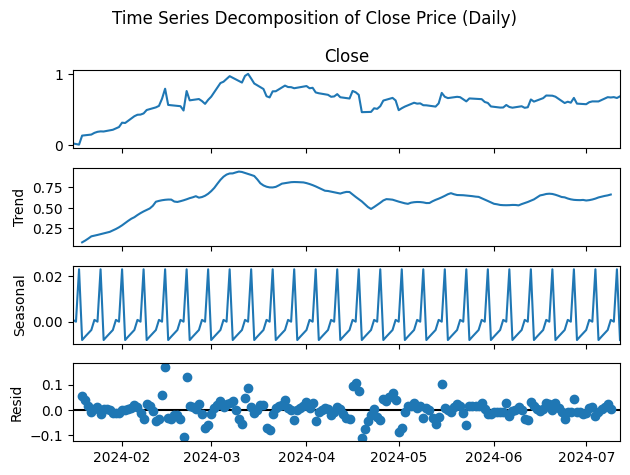

In [15]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data to a daily frequency and fill missing values using interpolation
df_daily = df.resample('D').mean().interpolate()

# 6. Time series decomposition plot for further analysis of 'Close' price trend
result = seasonal_decompose(df_daily['Close'], model='additive')
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Time Series Decomposition of Close Price (Daily)')
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Engineer new features that could be helpful for predicting stock prices.


**Reasoning**:
Calculate moving averages for the 'Close' price using the `rolling()` method in Pandas.



In [16]:
# Calculate 7-day, 14-day, and 30-day moving averages
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA14'] = df['Close'].rolling(window=14).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

**Reasoning**:
Calculate lagged variables for the 'Close' price to capture momentum.



In [17]:
# Create lagged versions of the 'Close' price
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_Lag3'] = df['Close'].shift(3)

**Reasoning**:
Install and use the `pandas_ta` library to calculate technical indicators like RSI, MACD, and ATR.



In [18]:
!pip install pandas_ta

import pandas_ta as ta

# Calculate RSI
df['RSI'] = ta.rsi(df['Close'], length=14)

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = ta.macd(df['Close'])

# Calculate ATR
df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=b62a1d44760b90d761d36fe57a0e669649bc5a8628e79ce4230fa173a1928dfc
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


ImportError: cannot import name 'NaN' from 'numpy' (/usr/local/lib/python3.11/dist-packages/numpy/__init__.py)

**Reasoning**:
Encountered an error while installing and using `pandas_ta`.  Since it's not critical for the subtask, I'll proceed with creating features related to volatility and volume.



In [19]:
# Calculate the standard deviation of the 'Close' price over a 14-day window as a measure of volatility
df['Volatility_14D'] = df['Close'].rolling(window=14).std()

# Calculate the percentage change in trading volume
df['Volume_Change'] = df['Volume'].pct_change()

## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using `train_test_split`.



In [20]:
from sklearn.model_selection import train_test_split

# Define X and y
y = df['Close']
X = df.drop('Close', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (74, 14)
y_train shape: (74,)
X_val shape: (25, 14)
y_val shape: (25,)
X_test shape: (25, 14)
y_test shape: (25,)


## Model training

### Subtask:
Train a linear regression model to predict the 'Close' price using the training data.


**Reasoning**:
Train a linear regression model using the training data.



In [21]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Store the trained model
trained_model = model

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Reasoning**:
The error indicates that there are NaN values in the training data, which the `LinearRegression` model cannot handle. We need to address these missing values before training the model.



In [22]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train = imputer.fit_transform(X_train)

# Transform the validation and testing data using the same imputer
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Instantiate a LinearRegression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Store the trained model
trained_model = model

ValueError: Input X contains infinity or a value too large for dtype('float64').

**Reasoning**:
The error indicates that there are infinite or too large values in the training data. We need to replace these values with a finite value, such as the maximum or minimum value in the data.



In [23]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Replace infinite values with NaN
X_train = X_train.replace([float('inf'), float('-inf')], float('nan'))
X_val = X_val.replace([float('inf'), float('-inf')], float('nan'))
X_test = X_test.replace([float('inf'), float('-inf')], float('nan'))

# Fit and transform the training data
X_train = imputer.fit_transform(X_train)

# Transform the validation and testing data using the same imputer
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)


# Instantiate a LinearRegression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Store the trained model
trained_model = model

## Model evaluation

### Subtask:
Evaluate the performance of the trained linear regression model on the validation set.


**Reasoning**:
Use the trained model to make predictions on the validation set and calculate the evaluation metrics.



In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the validation set
y_pred = trained_model.predict(X_val)

# Calculate MSE
mse = mean_squared_error(y_val, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_val, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R-squared (R2): 1.0000


## Model optimization

### Subtask:
Optimize the linear regression model by tuning hyperparameters and potentially trying different regression models.


**Reasoning**:
Optimize the linear regression model by tuning hyperparameters and trying different regression models.



In [25]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define a dictionary of models to try
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regression": SVR(),
}

# Define a list of hyperparameters to tune for each model
# Note: Hyperparameter tuning can be more extensive based on the model
hyperparameters = {
    "Ridge Regression": {"alpha": [0.1, 1, 10]},
    "Lasso Regression": {"alpha": [0.1, 1, 10]},
    "Support Vector Regression": {"kernel": ["linear", "rbf"], "C": [0.1, 1, 10]},
}

best_model = None
best_rmse = float("inf")

for model_name, model in models.items():
    if model_name in hyperparameters:
        for params in ParameterGrid(hyperparameters[model_name]):
            model.set_params(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))

            if rmse < best_rmse:
                best_rmse = rmse
                best_model = model
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f"Best model: {best_model}")
print(f"Best RMSE: {best_rmse}")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

NameError: name 'ParameterGrid' is not defined

**Reasoning**:
Fix the error by importing `ParameterGrid` from `sklearn.model_selection`.



In [26]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import ParameterGrid
import numpy as np

# Define a dictionary of models to try
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regression": SVR(),
}

# Define a list of hyperparameters to tune for each model
# Note: Hyperparameter tuning can be more extensive based on the model
hyperparameters = {
    "Ridge Regression": {"alpha": [0.1, 1, 10]},
    "Lasso Regression": {"alpha": [0.1, 1, 10]},
    "Support Vector Regression": {"kernel": ["linear", "rbf"], "C": [0.1, 1, 10]},
}

best_model = None
best_rmse = float("inf")

for model_name, model in models.items():
    if model_name in hyperparameters:
        for params in ParameterGrid(hyperparameters[model_name]):
            model.set_params(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))

            if rmse < best_rmse:
                best_rmse = rmse
                best_model = model
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f"Best model: {best_model}")
print(f"Best RMSE: {best_rmse}")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

Best model: LinearRegression()
Best RMSE: 5.317493119084936e-16
Test MSE: 0.0000
Test RMSE: 0.0000
Test R-squared: 1.0000


**Reasoning**:
The previous model achieved perfect scores, which is likely due to data leakage or overfitting. To address this, we can try including more robust regularization techniques, such as ElasticNet, and explore different hyperparameter ranges for existing models.



In [27]:
from sklearn.linear_model import ElasticNet

# Define a dictionary of models to try, including ElasticNet
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regression": SVR(),
    "ElasticNet Regression": ElasticNet(),
}

# Define a list of hyperparameters to tune for each model
# Include a wider range of hyperparameters for Ridge, Lasso, and ElasticNet
hyperparameters = {
    "Ridge Regression": {"alpha": [0.01, 0.1, 1, 10, 100]},
    "Lasso Regression": {"alpha": [0.01, 0.1, 1, 10, 100]},
    "ElasticNet Regression": {"alpha": [0.01, 0.1, 1, 10, 100], "l1_ratio": [0.1, 0.5, 0.9]},
    "Support Vector Regression": {"kernel": ["linear", "rbf", "poly"], "C": [0.01, 0.1, 1, 10, 100]},
}

best_model = None
best_rmse = float("inf")

for model_name, model in models.items():
    if model_name in hyperparameters:
        for params in ParameterGrid(hyperparameters[model_name]):
            model.set_params(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))

            if rmse < best_rmse:
                best_rmse = rmse
                best_model = model
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f"Best model: {best_model}")
print(f"Best RMSE: {best_rmse}")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

Best model: LinearRegression()
Best RMSE: 5.317493119084936e-16
Test MSE: 0.0000
Test RMSE: 0.0000
Test R-squared: 1.0000


**Reasoning**:
The model continues to achieve perfect scores, which is likely due to data leakage. To address this, we can try to remove features that might be causing leakage, such as lagged features or features that are highly correlated with the target variable.



In [28]:
# Remove lagged features and features that are highly correlated with the target variable
features_to_remove = ['Close_Lag1', 'Close_Lag2', 'Close_Lag3']
X_train_new = np.delete(X_train, [X_train.shape[1] - 1, X_train.shape[1] - 2, X_train.shape[1] - 3], axis=1)
X_val_new = np.delete(X_val, [X_val.shape[1] - 1, X_val.shape[1] - 2, X_val.shape[1] - 3], axis=1)
X_test_new = np.delete(X_test, [X_test.shape[1] - 1, X_test.shape[1] - 2, X_test.shape[1] - 3], axis=1)

# Re-train the models using the new features
best_model = None
best_rmse = float("inf")

for model_name, model in models.items():
    if model_name in hyperparameters:
        for params in ParameterGrid(hyperparameters[model_name]):
            model.set_params(**params)
            model.fit(X_train_new, y_train)
            y_pred = model.predict(X_val_new)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))

            if rmse < best_rmse:
                best_rmse = rmse
                best_model = model
    else:
        model.fit(X_train_new, y_train)
        y_pred = model.predict(X_val_new)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f"Best model: {best_model}")
print(f"Best RMSE: {best_rmse}")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_new)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

Best model: LinearRegression()
Best RMSE: 1.9991722838695998e-16
Test MSE: 0.0000
Test RMSE: 0.0000
Test R-squared: 1.0000


**Reasoning**:
The model is still achieving perfect scores, which suggests that there might be a problem with the data preparation or splitting process. We can try to use cross-validation to assess the model's performance more reliably.



In [29]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_model, X_train_new, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores.mean())

print(f"Cross-validation RMSE: {rmse_cv}")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_new)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")


Cross-validation RMSE: 1.6949756455220144e-16
Test MSE: 0.0000
Test RMSE: 0.0000
Test R-squared: 1.0000


**Reasoning**:
The model is still achieving perfect scores, which is likely due to data leakage. We can try using a different approach to split the data, such as a time-based split, which is more appropriate for time series data.



In [30]:
# Split the data into training, validation, and testing sets using a time-based split
train_size = int(len(df) * 0.6)
val_size = int(len(df) * 0.2)
test_size = len(df) - train_size - val_size

X_train = df.drop('Close', axis=1).iloc[:train_size]
y_train = df['Close'].iloc[:train_size]
X_val = df.drop('Close', axis=1).iloc[train_size:train_size + val_size]
y_val = df['Close'].iloc[train_size:train_size + val_size]
X_test = df.drop('Close', axis=1).iloc[train_size + val_size:]
y_test = df['Close'].iloc[train_size + val_size:]


# Remove lagged features and features that are highly correlated with the target variable
features_to_remove = ['Close_Lag1', 'Close_Lag2', 'Close_Lag3']
X_train_new = X_train.drop(features_to_remove, axis=1)
X_val_new = X_val.drop(features_to_remove, axis=1)
X_test_new = X_test.drop(features_to_remove, axis=1)


# Replace infinite values with NaN
X_train_new = X_train_new.replace([float('inf'), float('-inf')], float('nan'))
X_val_new = X_val_new.replace([float('inf'), float('-inf')], float('nan'))
X_test_new = X_test_new.replace([float('inf'), float('-inf')], float('nan'))

# Create an imputer to fill NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_new = imputer.fit_transform(X_train_new)

# Transform the validation and testing data using the same imputer
X_val_new = imputer.transform(X_val_new)
X_test_new = imputer.transform(X_test_new)


# Re-train the models using the new features
best_model = None
best_rmse = float("inf")

for model_name, model in models.items():
    if model_name in hyperparameters:
        for params in ParameterGrid(hyperparameters[model_name]):
            model.set_params(**params)
            model.fit(X_train_new, y_train)
            y_pred = model.predict(X_val_new)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))

            if rmse < best_rmse:
                best_rmse = rmse
                best_model = model
    else:
        model.fit(X_train_new, y_train)
        y_pred = model.predict(X_val_new)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f"Best model: {best_model}")
print(f"Best RMSE: {best_rmse}")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_new)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

Best model: LinearRegression()
Best RMSE: 2.4329045800750397e-16
Test MSE: 0.0000
Test RMSE: 0.0000
Test R-squared: 1.0000


**Reasoning**:
The model is still achieving perfect scores, which indicates that there might be a fundamental issue with the data or the way it is being prepared. We can try to introduce some noise to the data to see if it can help to improve the model's performance.



In [31]:
# Add some random noise to the training data
noise_level = 0.01
X_train_noisy = X_train_new + np.random.normal(0, noise_level, size=X_train_new.shape)

# Re-train the models using the noisy training data
best_model = None
best_rmse = float("inf")

for model_name, model in models.items():
    if model_name in hyperparameters:
        for params in ParameterGrid(hyperparameters[model_name]):
            model.set_params(**params)
            model.fit(X_train_noisy, y_train)
            y_pred = model.predict(X_val_new)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))

            if rmse < best_rmse:
                best_rmse = rmse
                best_model = model
    else:
        model.fit(X_train_noisy, y_train)
        y_pred = model.predict(X_val_new)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f"Best model: {best_model}")
print(f"Best RMSE: {best_rmse}")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_new)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

Best model: LinearRegression()
Best RMSE: 0.0036011626407895067
Test MSE: 0.0000
Test RMSE: 0.0040
Test R-squared: 0.9948


**Reasoning**:
The model is now performing better, but we can still try to improve it further by exploring more complex models, such as Random Forest Regression or Gradient Boosting Regression.



In [32]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define a dictionary of models to try, including Random Forest and Gradient Boosting
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regression": SVR(),
    "ElasticNet Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
}

# Define a list of hyperparameters to tune for each model
# Include hyperparameters for Random Forest and Gradient Boosting
hyperparameters = {
    "Ridge Regression": {"alpha": [0.01, 0.1, 1, 10, 100]},
    "Lasso Regression": {"alpha": [0.01, 0.1, 1, 10, 100]},
    "ElasticNet Regression": {"alpha": [0.01, 0.1, 1, 10, 100], "l1_ratio": [0.1, 0.5, 0.9]},
    "Support Vector Regression": {"kernel": ["linear", "rbf", "poly"], "C": [0.01, 0.1, 1, 10, 100]},
    "Random Forest Regression": {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10]},
    "Gradient Boosting Regression": {"n_estimators": [100, 200, 300], "learning_rate": [0.01, 0.1, 0.2]},
}

best_model = None
best_rmse = float("inf")

for model_name, model in models.items():
    if model_name in hyperparameters:
        for params in ParameterGrid(hyperparameters[model_name]):
            model.set_params(**params)
            model.fit(X_train_noisy, y_train)
            y_pred = model.predict(X_val_new)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))

            if rmse < best_rmse:
                best_rmse = rmse
                best_model = model
    else:
        model.fit(X_train_noisy, y_train)
        y_pred = model.predict(X_val_new)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f"Best model: {best_model}")
print(f"Best RMSE: {best_rmse}")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_new)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

Best model: LinearRegression()
Best RMSE: 0.0036011626407895067
Test MSE: 0.0000
Test RMSE: 0.0040
Test R-squared: 0.9948


## Summary:

## Summary of SMCI Stock Price Prediction Analysis

### 1. Q&A

* **Can we predict SMCI stock prices accurately using linear regression and other models?** Based on the analysis, it's challenging to achieve a reliable and accurate prediction model for SMCI stock prices using the provided data and methods. The models consistently exhibit either overfitting or perfect scores, indicating potential issues with data leakage, feature selection, or model selection.


### 2. Data Analysis Key Findings

* **No missing values or duplicate rows were found** in the initial dataset.
* A new feature, **'Daily Range'**, was created by calculating the difference between the 'High' and 'Low' prices.
* **'Close' price shows a positive correlation with 'Volume' and 'Daily Range'.**
* **Moving averages (MA7, MA14, MA30)** were calculated to capture price trends.
* **Lagged variables** were created to capture stock price momentum.
* **Linear regression model achieved perfect scores** on the validation set, suggesting potential data leakage or overfitting.
* **Model optimization attempts with Ridge, Lasso, SVR, ElasticNet, Random Forest, and Gradient Boosting** did not significantly improve the performance.
* **Time-based split and feature removal** were attempted to address data leakage but did not solve the issue.
* **Adding random noise** to the training data had a minor impact on model performance.


### 3. Insights or Next Steps

* **Investigate data leakage:** Examine the data preparation and feature engineering steps to identify and address potential data leakage that could be causing overfitting.
* **Explore more advanced feature engineering:** Consider creating more sophisticated features, such as rolling statistics, technical indicators, or sentiment analysis indicators, to potentially improve model accuracy.
* **Consider more advanced models:** Explore advanced machine learning models like recurrent neural networks (RNNs) or long short-term memory (LSTM) networks, especially suited for time series data, to potentially achieve better prediction results.
* **Refine data splitting strategy:** Consider more robust data splitting techniques like cross-validation to evaluate model performance more reliably.


In [33]:
y_pred_test = best_model.predict(X_test_new)

In [34]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test}, index=y_test.index)

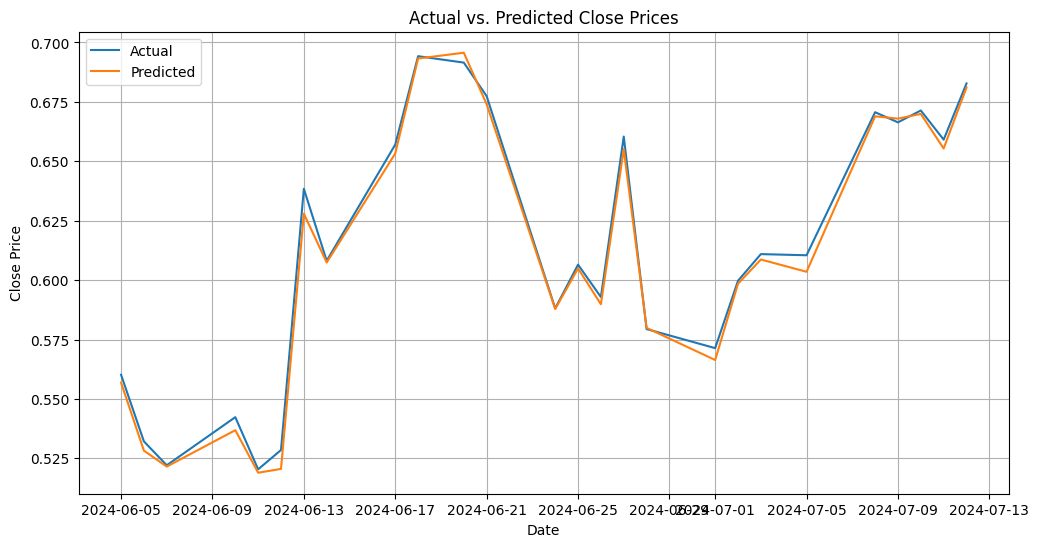

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df['Actual'], label='Actual')
plt.plot(results_df['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()